# Applied Statistics Project

## 1. Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

## 2. Read the data as a data frame

In [2]:
ins=pd.read_csv("../PGPAIML/insurance.csv")
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. EDA of the given data

### a. Shape  and type of data

In [3]:
ins.shape

(1338, 7)

##### The data set has 1338 rows and 7 attributes

In [4]:
ins.dtypes.to_frame(name= "Data Type")

,Data Type
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


### b. Checking for missing values

In [5]:
ins.isna().sum().to_frame(name=" Missing Values")

,Missing Values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


##### The dataset has no missing values

### c. 5 point summary

In [6]:
ins.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### d. Distribution of 'bmi', 'age', and 'charges' columns

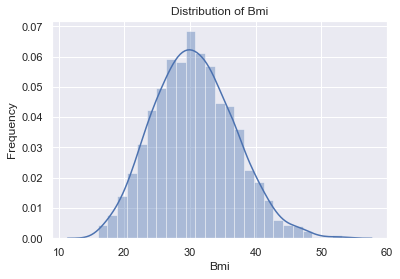

In [8]:
sns.distplot(ins['bmi'])
plt.xlabel('Bmi')
plt.ylabel('Frequency')
plt.title('Distribution of Bmi');

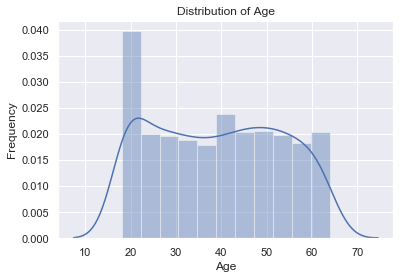

In [9]:
sns.distplot(ins['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age');

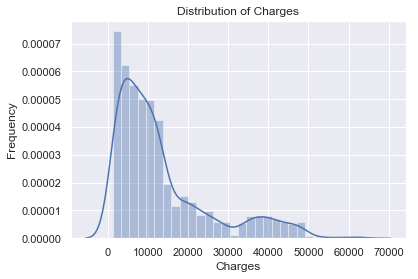

In [10]:
sns.distplot(ins['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges');

##### a) Bmi is normally distributed
##### b) People of age group around 20 are more in number in the given data
##### c) Charges is skewed to the positive side

### e. Measure of skewness for 'bmi', 'age' and 'charges

In [11]:
print("Bmi is skewed by" ,ins.bmi.skew(), "which is approximately symmetric")

Bmi is skewed by 0.2840471105987448 which is approximately symmetric


In [12]:
print("Age is skewed by" ,ins.age.skew(), "which is approximately symmetric")

Age is skewed by 0.05567251565299186 which is approximately symmetric


In [13]:
print("Charges is skewed by" ,ins.charges.skew(), "which is highly skewed to the right")

Charges is skewed by 1.5158796580240388 which is highly skewed to the right


### f. Checking for outliers in 'bmi', 'age', and 'charges'

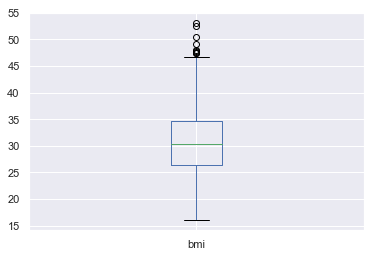

In [104]:
ins.boxplot("bmi");

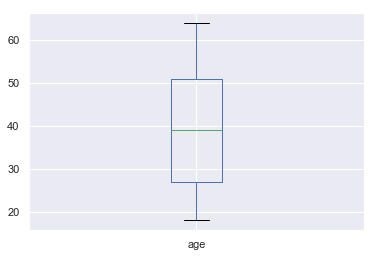

In [105]:
ins.boxplot("age");

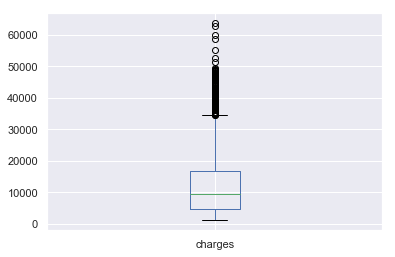

In [106]:
ins.boxplot("charges");

##### Except Age, Bmi and Charges have outliers

### g. Distribution of categorical variables

In [14]:
# Covert children,sex,smoker,region to categorical variables
ins['children'] = ins['children'].astype('category')
ins['sex'] = ins['sex'].astype('category')
ins['smoker'] = ins['smoker'].astype('category')
ins['region'] = ins['region'].astype('category')
ins.dtypes.to_frame(name=" Data Type")

,Data Type
age,int64
sex,category
bmi,float64
children,category
smoker,category
region,category
charges,float64


In [16]:
ins['sex'].value_counts().to_frame(name= "Count of sex")

,Count of sex
male,676
female,662


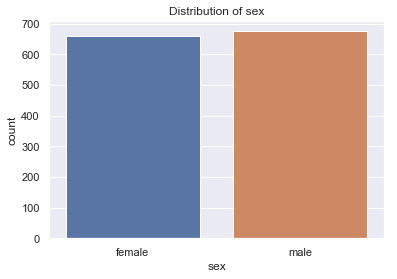

In [18]:
sns.countplot(ins['sex'])
plt.title("Distribution of sex");

##### Males and Females are almost equally distributed in the dataset

In [19]:
ins['children'].value_counts().to_frame(name= "Count of Children")

,Count of Children
0,574
1,324
2,240
3,157
4,25
5,18


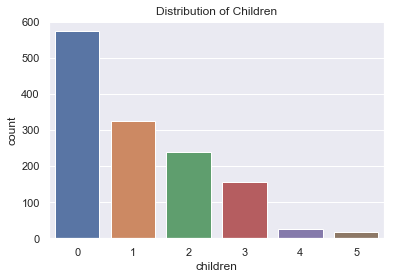

In [20]:
sns.countplot(ins['children'])
plt.title("Distribution of Children");

##### People with no children have higher distribution in the data

In [21]:
ins['region'].value_counts().to_frame(name= "Count of Regions")

,Count of Regions
southeast,364
southwest,325
northwest,325
northeast,324


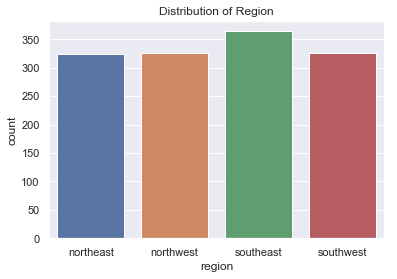

In [22]:
sns.countplot(ins['region'])
plt.title("Distribution of Region");

##### Southeast has a higher distribution compared to remaining regions

In [23]:
ins['smoker'].value_counts().to_frame(name= "Count of Smokers")

,Count of Smokers
no,1064
yes,274


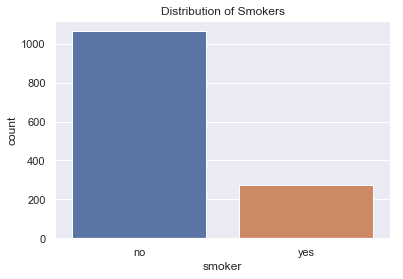

In [24]:
sns.countplot(ins['smoker'])
plt.title("Distribution of Smokers");

##### Non-smokers have higher distribution as compared to smokers

### h. Pairplots for all columns

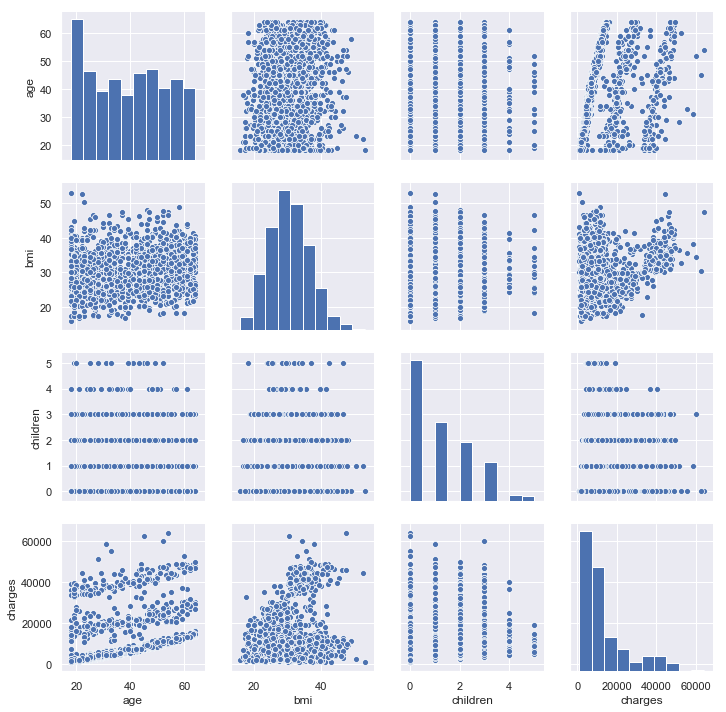

In [127]:
sns.pairplot(ins);

## 4. EDA for statistical analysis

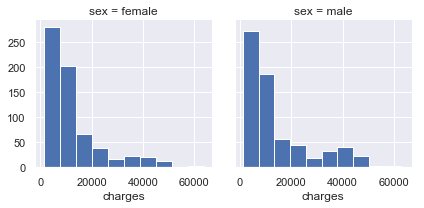

In [25]:
g=sns.FacetGrid(ins,col='sex')
g.map(plt.hist,'charges');

In [151]:
ins.groupby('sex')['charges'].mean().to_frame(name="Avg Charges")

,Avg Charges
sex,
female,12569.578844
male,13956.751178


##### The mean charges for males and females differ by aprroximately 1000

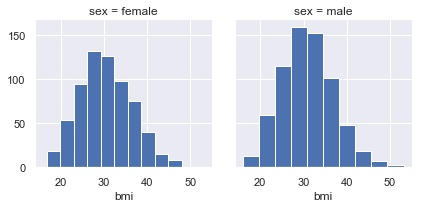

In [152]:
g=sns.FacetGrid(ins,col='sex')
g.map(plt.hist,'bmi');

In [153]:
ins.groupby('sex')['bmi'].mean().to_frame(name="Avg Bmi")

,Avg Bmi
sex,
female,30.377749
male,30.943129


##### The mean of BMI for both males and females seems to be the same

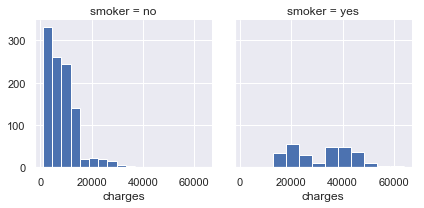

In [154]:
g=sns.FacetGrid(ins,col='smoker')
g.map(plt.hist,'charges');

In [169]:
ins.groupby('smoker')['charges'].mean().to_frame(name="Avg Charges")

,Avg Charges
smoker,
no,8434.268298
yes,32050.231832


##### The mean charges for a smoker and non-smoker seems to have significant difference

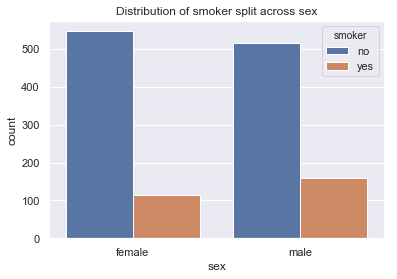

In [158]:
sns.countplot(ins['sex'],hue=ins['smoker'])
plt.title("Distribution of smoker split across sex");

In [160]:
pd.crosstab(ins['smoker'],ins['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


##### Females seems to dominate in the non-smokers category and males in the smokers category

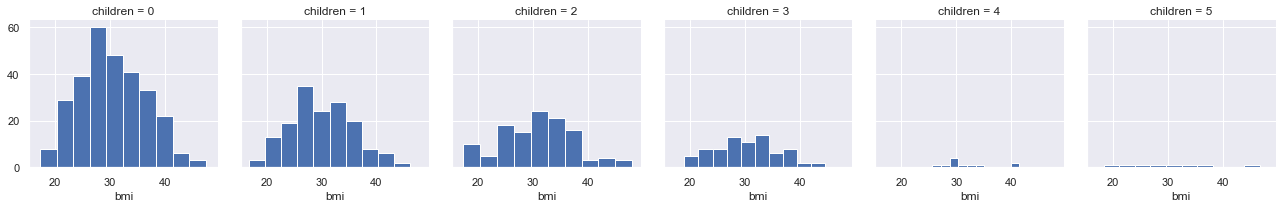

In [174]:
women = ins[ins.loc[:, 'sex'] == 'female']
g=sns.FacetGrid(women,col='children')
g.map(plt.hist,'bmi');


##### The frequency of BMI for  women with no children is higher compared to woman with children

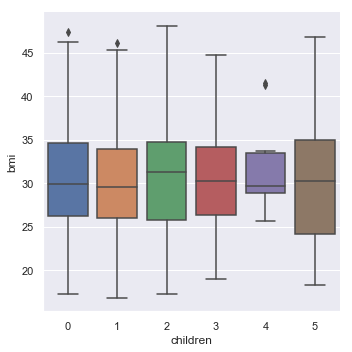

In [171]:
sns.catplot(x="children", y="bmi", kind="box", data=women);

##### The IQR for women with 0 & 2 children are almost same and women with 1 & 3 children are almost same

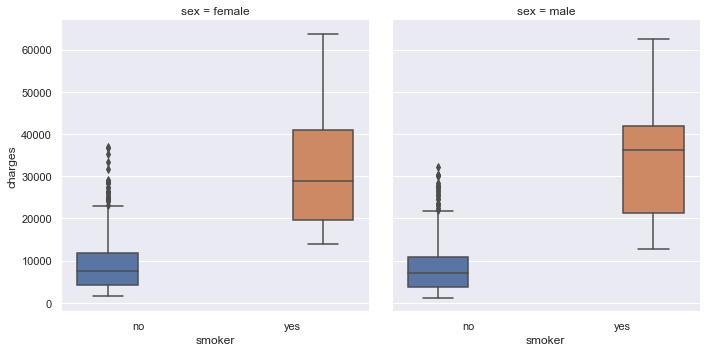

In [27]:
sns.catplot(x = 'smoker', y = 'charges', hue = 'smoker', col = 'sex', data = ins, kind = 'box');

##### Significant diffrence in charges for for smoker and non-smokers across sex, charges are higher for smokers across both males and females




## 5. Statistical Tests

### a. Do charges of people who smoke differ significantly from the people who don't?

#### To answer the above question we shall use Z-test, as per CLT regrardless of distribution of the population the sample mean is same as population mean and the sample standard deviation is std/sqrt(sample size)

#### Ho (Null): The charges across smoker and non-smokers are equal 
#### Ha (Alternative) : The charges across smoker and non-smokers are unequal 

In [50]:

from statsmodels.stats.weightstats import ztest

sample1 = ins.loc[ins.smoker == 'yes', 'charges']
sample2 = ins.loc[ins.smoker =='no', 'charges']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

print("test_statistic:",round(test_statistic,3))

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 5)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,5)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')


test_statistic: 46.665
Since the p-value, 0.0 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


#### Performing two sample T-test

In [51]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

print("test_statistic:",round(test_statistic,3))

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

test_statistic: 46.665
Since the p-value, 0.0 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


##### As the p-value is close to zero it can concluded that the charges are significantly different from a smoker to a non-smoker  


### b. Does bmi of males differ significantly from that of females

#### To answer the above question we shall use Z-test.

#### Ho (Null): The charges BMI across gender are equal
#### Ha (Alternative) : The BMI across gender are unequal

In [52]:

sample1 = ins.loc[ins.sex == 'male', 'bmi']
sample2 = ins.loc[ins.sex =='female', 'bmi']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

print("test_statistic:",round(test_statistic,3))

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 5)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,5)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')



test_statistic: 1.697
	 Since the p-value, 0.08974 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


#### Perfoming  two sample T-test

In [55]:
test_statistic, p_value = ttest_ind(sample1, sample2)

print('test_statistic:',round(test_statistic,3))

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 5)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,5)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

test_statistic: 1.697
	 Since the p-value, 0.08998 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


##### As the p-value is greater than 0.05 it can be concluded that there is no significant difference in bmi between geneder

### c. Is the proportion of smokers significantly different in different genders

#### To answer the above question we shall use Z-test of proprtion.

#### Ho (Null): The proportion of smokers is the same in both categories - males and females
#### Ha (Alternative) : The proportion of smokers is significantly different in both categories - males and females


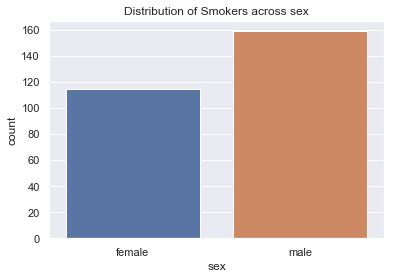

In [107]:

smoker=ins['smoker']=="yes"
smoker=ins[smoker]
smoker.shape
smoker.head()
pd.crosstab(smoker['smoker'],smoker['sex'])
sns.countplot(smoker['sex'])
plt.title("Distribution of Smokers across sex");

##### Proprtion of male smokers seems to be higher than female smoker

In [102]:
male=smoker.sex.value_counts()[:1].sum()
female=smoker.sex.value_counts()[1:].sum()
total=smoker.sex.value_counts().sum()

In [93]:
male/total,female/total

(0.5802919708029197, 0.4197080291970803)

In [104]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([male, female],[total])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 5)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,5)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.00017 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


##### As the p-value is close to zero it can be concluded that the proportion of smokers differ significantly across gender


### d. Is the distribution of bmi across women with no children, one child and two children, the same

#### To answer the above question we shall use one-way anova

#### Ho (Null): The average BMI across categories are the same
#### Ha (Alternative) : The average BMI across categories are not the same

In [142]:
women=ins['sex']=="female"
women=ins[women]
wo=women[women.children.isin([0,1,2])]
wo.shape

(566, 7)

In [143]:
wo.groupby('children')['bmi'].mean().to_frame(name="Avg BMI")

,Avg BMI
children,
0,30.361522
1,30.052658
2,30.649790
3,NaN
4,NaN
5,NaN


In [147]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('bmi ~ C(children)', data=wo).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),5.0,151.314093,30.262819,0.823263,0.533371
Residual,563.0,20695.661583,36.759612,NaN,NaN


##### As the P-value is larger than 0.05 we fail to reject the null hypothesis and conclude that the average bmi across categories of women with 0,1,2 children are the same.